# Exercises for Week 3: Algorithmic Thinking

## Name: Yongbum Kim

## Grading Scheme:

- **3 (Essentially perfect)**: All required questions have a complete solution and all outputs are essentially correct based on the sample outputs.
- **2 (Solid effort)**: Several required questions may be incomplete or the outputs incorrect, but at least two thirds has a correct solution.
- **1 (Some effort)**: Between one third and two thirds of the required questions have a correct solution.
- **0 (No submission or essentially blank)**: No submission on Brightspace by the deadline, or less than one third of the required questions have a correct solution.

Every question is required unless it is marked with "(optional)". **To ensure that you get 3 out of 3, before you submit, restart the Kernel and run all, and check that all of the outputs match the sample outputs from the PDF version of the exercises. You need to develop the habit of meticulously checking your outputs in order to ensure the best grade.** I will not count minor formating, rounding, or importing issues, but otherwise your output should match the sample outputs exactly when rerun.  The weekly exercises are intended to be completed in 4-5 hours, excluding class time. You should budget at least this much time per week for these exercises.

**After you submit, download the .ipynb file you uploaded to Brightspace and double check that you uploaded the correct file, and that every question has been properly saved! Do not assume that Jupyter will save automatically for you.**

## Exercise 3.1: Optimal Pricing

Write a function "optPrice" with two input arguments:

- `priceList`: a list of proposed prices.
- `valueList`: a list of numbers. Each number represents the willingness to pay for the product from a particular customer.

For a given price, the demand is equal to the number of customers with willingness to pay greater than or equal to the price. The function should iterate through the list of prices, and compute the estimated revenue for each price, which is equal to the price times the demand. 

The function should return two objects: the first is the best price found. The second object is a dictionary mapping each price to the estimated revenue for that price. 

**Sample run:**

```python
priceList=range(0,36,5)
valueList=[32,10,15,18,25,40,50,43]
bestPrice,revenueDict=optPrice(priceList,valueList)
print('Best price:',bestPrice)
print('Revenue dictionary:',revenueDict)
```

**Correct output:**

```
Best price: 25
Revenue dictionary: {0: 0, 5: 40, 10: 80, 15: 105, 20: 100, 25: 125, 30: 120, 35: 105}
```

**Solve this problem by applying the four steps of algorithmic thinking.**

**Step 1. Understand** (Write your summary in this Markdown cell)

Estimate the revenue for each given price and find the price with the highest revenue.

**Step 2. Decompose** (Write your instructions in this Markdown cell)

A. Iterate through the prices in the given priceList

B. Calculate the revenue for each given price: count the number of customer values greater than or equal to the price, and multiply this count with the price. Store the answer in a Dictionary.

C. Keep track of the best price found so far and another variable for the best revenue. When looping through the prices, update the variables appropriately.

**Step 3. Analyze** (Write code fragments in separate code cells to implement the trickiest steps, as in the in-class demonstration)

In [4]:
# A. Iterate through the prices in the given priceList.

priceList=range(0,36,5)
for price in priceList:
    print(price, end=' ')

0 5 10 15 20 25 30 35 

In [6]:
# B. Calculate the revenue for each given price: count the number of customer values greater than or equal to the price, and multiply this count with the price. Store the answer in a Dictionary.

valueList=[32,10,15,18,25,40,50,43]
revenueDict={}
price=25
count=0
for value in valueList:
    if value>= price:
        count+=1
revenueDict[price]=count*price
revenueDict

{25: 125}

In [8]:
# C. Keep track of the best price found so far and another variable for the best revenue. When looping through the prices, update the variables appropriately.

bestPrice=0
bestRevenue=0

price=25
revenue=125
if revenue>bestRevenue:
    bestRevenue=revenue
    bestPrice=price
print(f'Updated best so far: price={bestPrice} revenue={bestRevenue}')

Updated best so far: price=25 revenue=125


**Step 4. Synthesis** 


In [10]:
# Version for debugging: with intermediate printing and no function encapsulation

priceList=range(0,36,5)
valueList=[32,10,15,18,25,40,50,43]
revenueDict={}
bestPrice=0
bestRevenue=0

for price in priceList:
    print('Price: ', price)
    count=0
    for value in valueList:
        if value>= price:
            count+=1
    revenueDict[price]=count*price
    print('\tRevenue: ', revenueDict[price])
    if revenueDict[price]>bestRevenue:
        bestRevenue=revenueDict[price]
        bestPrice=price
        print(f'\tUpdated best so far: price={bestPrice} revenue={bestRevenue}')
print(f'Best overall: price={bestPrice} revenue={bestRevenue}')

Price:  0
	Revenue:  0
Price:  5
	Revenue:  40
	Updated best so far: price=5 revenue=40
Price:  10
	Revenue:  80
	Updated best so far: price=10 revenue=80
Price:  15
	Revenue:  105
	Updated best so far: price=15 revenue=105
Price:  20
	Revenue:  100
Price:  25
	Revenue:  125
	Updated best so far: price=25 revenue=125
Price:  30
	Revenue:  120
Price:  35
	Revenue:  105
Best overall: price=25 revenue=125


In [12]:
# Final code 

def optPrice(priceList, valueList):
    revenueDict={}
    bestPrice=0
    bestRevenue=0
    for price in priceList:
        count=0
        for value in valueList:
            if value>= price:
                count+=1
        revenueDict[price]=count*price
        if revenueDict[price]>bestRevenue:
            bestRevenue=revenueDict[price]
            bestPrice=price
    return bestPrice, revenueDict

In [24]:
# Test code 1
priceList=range(0,40,5)
valueList=[32,10,15,18,25,40,50,43]
bestPrice,revenueDict=optPrice(priceList,valueList)
print('Best price:',bestPrice)
print('Revenue dictionary:',revenueDict)

# Output should be:
# Best price: 25
# Revenue dictionary: {0: 0, 5: 40, 10: 80, 15: 105, 20: 100, 25: 125, 30: 120, 35: 105}

Best price: 25
Revenue dictionary: {0: 0, 5: 40, 10: 80, 15: 105, 20: 100, 25: 125, 30: 120, 35: 105}


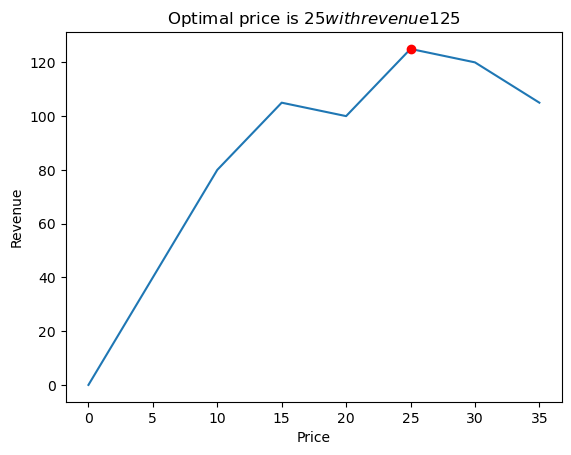

In [28]:
# Graphical display
priceList=range(0,40,5)
valueList=[32,10,15,18,25,40,50,43]
bestPrice,revenueDict=optPrice(priceList,valueList)

import matplotlib.pyplot as plt
revenueList=[revenueDict[price] for price in priceList]
plt.plot(priceList,revenueList)
plt.plot([bestPrice],[revenueDict[bestPrice]],'ro')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title(f'Optimal price is ${bestPrice} with revenue ${revenueDict[bestPrice]}')
plt.show()

# Output should be: Optimal price is $25 with revenue $125

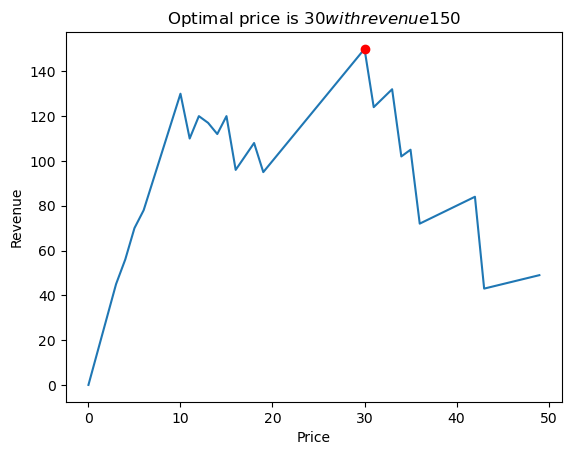

In [30]:
# Test code 2
bestPrice,revenueDict=optPrice(range(0,50),[10,15,12,30,42,50,18,13,15,5,3,10,35,33,10])
import matplotlib.pyplot as plt
import pandas as pd
pd.Series(revenueDict).plot()
plt.plot([bestPrice],[revenueDict[bestPrice]],'ro')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title(f'Optimal price is ${bestPrice} with revenue ${revenueDict[bestPrice]}')
plt.show()

# Output should be: Optimal price is $30 with revenue $150

## Exercise 3.2: Optimal Stocking Level

Write a function named `optBaseStock` with four input arguments:

- `levelList`: a list of possible stocking levels to optimize over.
- `demandList`: a list of demand scenarios. 
- `underage`: the unit cost of having too little inventory to meet demand.
- `overage`: the unit cost of having too much inventory.

For each possible stocking level, the function should compute the average inventory cost, which is defined as the average over all demand scenarios of the total underage cost plus the total overage cost. For example, if the stocking level is 10, the demand scenarios are `[6,12,14]`, the underage cost is 9 and the overage is 5, then

- The inventory cost for the scenario `demand=6` is $(10-6)\times 5=20$, because the stocking level is 4 units too high. (The overage cost of 5/unit is applied when the inventory is too high.)
- The inventory cost for the scenario `demand=12` is $(12-10)\times 9=18$, because the stocking level is 2 units too low. (The underage cost of 9/unit is applied when the inventory is too low.) 
- The inventory cost for the scenario `demand=14` is $(14-10)\times 9=36$, because the stocking level is 4 units too low. 

The average inventory cost for stocking level 10 is $(20+18+36)/3=74/3\approx 24.67$.  

The function should return two objects:

- `bestLevel`: the stocking level in `levelList` that achieves the minimum average inventory cost (if there is a tie, return the smallest stocking level that yields the minimum cost).
- `avCost`: a dictionary that maps each stocking level to the corresponding average inventory cost.

**Sample run:**

```python
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,avCost=optBaseStock(levelList,demandList,underage,overage)
print('bestLevel:',bestLevel)
print('avCost:',avCost)
```

**Correct output:**

```
bestLevel 20
avCost {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}
```

**Solve this problem by applying the four steps of algorithmic thinking.**

**Step 1. Understand** (Write your summary of the task in this cell:)

Calculate the stocking level that achieves the minimum average inventory cost for all demand scenarios.

**Step 2. Decompose** (Write your instructions in this Markdown cell)

A. Iterate through the stocking level in the given levelList.

B. Calculate the average inventory cost for each given stocking level: compare the value of stocking level and demand, and multiply the difference with the underage if the stocking level is greater than demand or multiply the difference with the overage if the stocking level is less than demand. Store the answer in a Dictionary.

C. Keep track of the minimum average inventory cost found so far for the best stocking level. When looping through the stocking levels, update the variables appropriately.

**Step 3. Analyze** (Write code fragments in separate code cells to implement the trickiest steps)

In [35]:
# A. Iterate through the stocking level in the given levelList.

levelList=range(0,30,5)
for level in levelList:
    print(level, end=' ') 

0 5 10 15 20 25 

In [61]:
# B. Calculate the average inventory cost for each given stocking level: compare the value of stocking level and demand, and multiply the difference with the underage if the stocking level is greater than demand or multiply the difference with the overage if the stocking level is less than demand. Store the answer in a Dictionary.

level=20
demandList=[10,18,5,20,16,30,15,3,5,10]
underage=10
overage=3

cost=0
avCost={}

for demand in demandList:
    if level >= demand:
        cost += (level-demand)*overage
    else:
        cost += (demand-level)*underage
    print(f'Summing up: {cost}')
average_cost = cost / len(demandList)
print(f'Average cost for level {level}: {average_cost}')
avCost[level] = average_cost
avCost

# Output should be:
# bestLevel 20
# avCost {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}

Summing up: 30
Summing up: 36
Summing up: 81
Summing up: 81
Summing up: 93
Summing up: 193
Summing up: 208
Summing up: 259
Summing up: 304
Summing up: 334
Average cost for level 20: 33.4


{20: 33.4}

In [65]:
# C. Keep track of the minimum average inventory cost found so far for the best stocking level. When looping through the stocking levels, update the variables appropriately.

bestLevel=10
minimumCost=54.1

level=20
cost=33.4
if cost<minimumCost:
    minimumCost=cost
    bestLevel=level
print(f'Updated minimum average inventory cost so far: stocking level={bestLevel} average inventory cost={minimumCost}')

# Output should be:
# bestLevel 20
# avCost {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}

Updated minimum average inventory cost so far: stocking level=20 average inventory cost=33.4


**Step 4. Synthesize** (Combine your code fragments from Step 3, but do so in an incremental fashion and print intermediate results)

In [71]:
# Version for debugging: with intermediate printing and no function encapsulation

levelList=range(0,30,5)
demandList=[10,18,5,20,16,30,15,3,5,10]
avCost={}
minimumCost=100000000
underage=10
overage=3

for level in levelList:
    cost=0
    for demand in demandList:
        if level >= demand:
            cost += (level-demand)*overage
        else:
            cost += (demand-level)*underage
        print(f'Summing up: {cost}')
    average_cost = cost / len(demandList)
    print(f'Average cost for level {level}: {average_cost}')
    avCost[level] = average_cost
    print(avCost)
    if cost<minimumCost:
        minimumCost=cost
        bestLevel=level
        print(f'Updated minimum average inventory cost so far: stocking level={bestLevel} average inventory cost={minimumCost}')
print(f'Minimum average inventory cost so far: stocking level={bestLevel} average inventory cost={minimumCost}')

# Output should be:
# bestLevel 20
# avCost {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}

Summing up: 100
Summing up: 280
Summing up: 330
Summing up: 530
Summing up: 690
Summing up: 990
Summing up: 1140
Summing up: 1170
Summing up: 1220
Summing up: 1320
Average cost for level 0: 132.0
{0: 132.0}
Updated minimum average inventory cost so far: stocking level=0 average inventory cost=1320
Summing up: 50
Summing up: 180
Summing up: 180
Summing up: 330
Summing up: 440
Summing up: 690
Summing up: 790
Summing up: 796
Summing up: 796
Summing up: 846
Average cost for level 5: 84.6
{0: 132.0, 5: 84.6}
Updated minimum average inventory cost so far: stocking level=5 average inventory cost=846
Summing up: 0
Summing up: 80
Summing up: 95
Summing up: 195
Summing up: 255
Summing up: 455
Summing up: 505
Summing up: 526
Summing up: 541
Summing up: 541
Average cost for level 10: 54.1
{0: 132.0, 5: 84.6, 10: 54.1}
Updated minimum average inventory cost so far: stocking level=10 average inventory cost=541
Summing up: 15
Summing up: 45
Summing up: 75
Summing up: 125
Summing up: 135
Summing up: 2

In [73]:
# Final code: removing intermediate printing and encapuslating in a function

def optBaseStock(levelList, demandList, underage, overage):
    avCost = {}
    bestLevel = 0
    
    minimumCost = 100000000

    for level in levelList:
        cost = 0
        for demand in demandList:
            if level >= demand:
                cost += (level-demand)*overage
            else:
                cost += (demand-level)*underage
        average_cost = cost / len(demandList)
        avCost[level] = average_cost
        if average_cost < minimumCost:
            minimumCost = average_cost
            bestLevel = level
    return bestLevel, avCost

In [75]:
# Sample run
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,avCost=optBaseStock(levelList,demandList,underage,overage)
print('bestLevel:',bestLevel)
print('avCost:',avCost)

# Output should be:
# bestLevel 20
# avCost {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}

bestLevel: 20
avCost: {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}


The following code illustrates how the results might be graphed as in Exercise 3.1

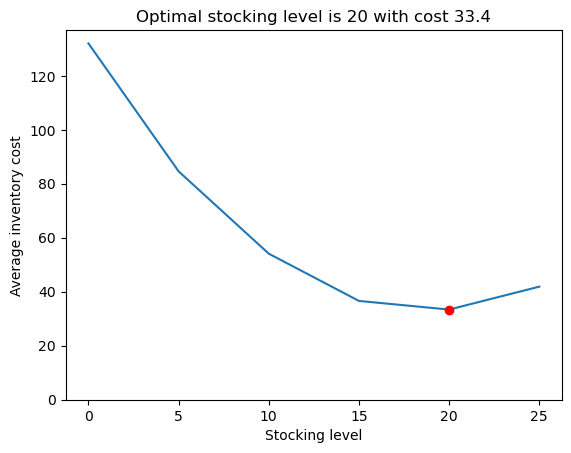

In [77]:
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,cost=optBaseStock(levelList,demandList,underage,overage)

import matplotlib.pyplot as plt
levelList=sorted(levelList)
costList=[cost[level] for level in levelList]
plt.plot(levelList,costList)
plt.plot([bestLevel],[cost[bestLevel]],'ro')
plt.title(f'Optimal stocking level is {bestLevel} with cost {round(cost[bestLevel],2)}')
plt.xlabel('Stocking level')
plt.ylabel('Average inventory cost')
plt.ylim(bottom=0)
plt.show()

# Output should be:
# bestLevel 20
# avCost {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}

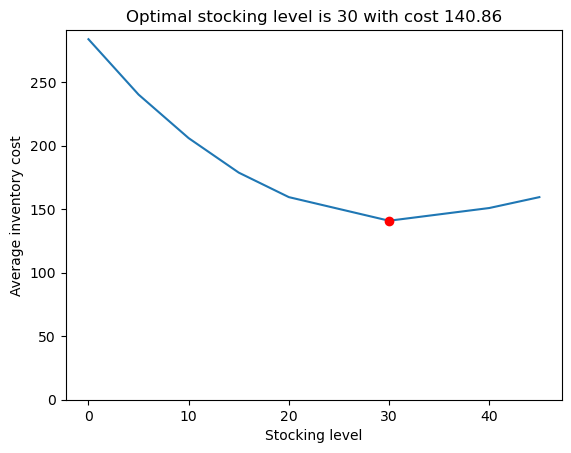

In [79]:
#Sample run 2
demandList=[10,18,5,16,30,15,3,5,10,60,50,30,40,20,30,20,50,80,30,60,80]
levelList=range(0,50,5)
underage=9
overage=6
bestLevel,cost=optBaseStock(levelList,demandList,underage,overage)

import matplotlib.pyplot as plt
levelList=sorted(levelList)
costList=[cost[level] for level in levelList]
plt.plot(levelList,costList)
plt.plot([bestLevel],[cost[bestLevel]],'ro')
plt.title(f'Optimal stocking level is {bestLevel} with cost {round(cost[bestLevel],2)}')
plt.xlabel('Stocking level')
plt.ylabel('Average inventory cost')
plt.ylim(bottom=0)
plt.show()

# Output should be: Optimal stocking level is 30 with cost 140.86

## Exercise 3.3: Demand Estimation for Substitutable Products

Write a function named "demand" with two input arguments:

- `priceVector`: a list of length 2 containing two positive numbers, corresponding to the proposed prices for the two products.
- `values`: a list in which each element is a list of length 2, corresponding to the valuation of a customer for the two products.


The function should return a list of two numbers, representing the number of customers purchasing each product. Assume the same customer behavior as in the paper coding exercise.


**Sample run:** 

```python
values=[[25,15],[18,18],[30,20],[30,30]]
priceVector=[25,20]
demand(priceVector,values)
```

**Correct result:**

```
[2, 1]
```

**Solve this problem by applying the four steps of algorithmic thinking.**


**Step 1. Understand:** Summarize the task in your own words and verify your understanding by manually computing the results for a few inputs. 

Count how many people would buy each of the products.

**Step 2. Decompose:** Write clear and precise instructions for another human being to manually compute the appropriate results for any possible input, imagining that the person does not have access to the problem description but only has your instructions to go on. 

A. Go through the people.

B. For each person, figure out what he/she will buy, if anything.

C. Keep a tally of how many people buy each product.

**Step 3. Analyze:** For each part of the instructions above, plan how you would implement it using computer code. For the trickest parts, write code fragments and create intermediate inputs to test each fragment by itself.

In [95]:
# A. Go through the people.

values=[[25,15],[18,18],[30,20],[30,30]]
for curVal in values:
    print('Valuation Vector:', curVal)

Valuation Vector: [25, 15]
Valuation Vector: [18, 18]
Valuation Vector: [30, 20]
Valuation Vector: [30, 30]


In [93]:
# B. For each person, figure out what he/she will buy, if anything.

curVal = [25,15]
priceVector = [25,20]
diff=[curVal[0]-priceVector[0], curVal[1]-priceVector[1]]
if diff[0]<0 and diff[1]<0:
    print('Buy nothing')
elif diff[0]>=diff[1]:
    print('Buy Product 0')
else:
    print('Buy Product 1')

Buy Product 0


In [91]:
# C. Keep a tally of how many people buy each product.

total = [0,0]
total[0] += 1
total[1] += 1
total

[1, 1]

**Step 4. Synthesize:** Using the results of Steps 1 and 2, put the code fragments from Step 3 together to create a complete solution. You should do this in an incremental fashion and print intermediate outputs as you go to make sure that each part of the code matches your expectations.

In [99]:
# Version for debugging: with intermediate printing and no function encapsulation

# A. Go through the people.

values=[[25,15],[18,18],[30,20],[30,30]]
priceVector = [25,20]
total = [0,0]

for curVal in values:
    print('Valuation Vector:', curVal)

# B. For each person, figure out what he/she will buy, if anything.

diff=[curVal[0]-priceVector[0], curVal[1]-priceVector[1]]
if diff[0]<0 and diff[1]<0:
    print('Buy nothing')
elif diff[0]>=diff[1]:
    print('Buy Product 0')
    total[0] += 1
else:
    print('Buy Product 1')
    total[1] += 1

# C. Keep a tally of how many people buy each product.

total

Valuation Vector: [25, 15]
Valuation Vector: [18, 18]
Valuation Vector: [30, 20]
Valuation Vector: [30, 30]
Buy Product 1


[0, 1]

In [101]:
# Final code (modify the above after it already works)

def demand(priceVector, values):
    total=[0,0]
    for curVal in values:
        # print('Valuation Vector:', curVal)
        diff=[curVal[0]-priceVector[0], curVal[1]-priceVector[1]]
        if diff[0]<0 and diff[1]<0:
            #print('Buy nothing')
            continue
        elif diff[0]>=diff[1]:
            #print('Buy Product 0')
            total[0] += 1
        else:
            #print('Buy Product 1')
            total[1] += 1
    return total

In [111]:
# Test code
values=[[25,15],[18,18],[30,20],[30,30]]
priceVector=[25,20]
demand(priceVector,values)

# Output should be: [2, 1]

[2, 1]

In [113]:
# Test code 2
values=[[25,15],[18,18],[30,20],[30,30],[20,10],[60,30],[0,20],[30,21]]
priceVector=[30,20]
demand(priceVector,values)

# Output should be: [2, 3]

[2, 3]

**For Exercise 3.4 and 3.5, you do not have to write out the four steps, but you are encouraged to code on paper first before typing.**

## Exercise 3.4: Airline Revenue Management

The question asks you to simulate the performance of a common revenue management strategy practiced by airlines for selling seats on a given flight. 

**Write a function called "simulateRevenue" with five input arguments:**

- `valueList`: a list of numbers, with each number representing a customer's maximum willingness to pay for a seat in the given flight. The list is ordered according to the sequence in which customers make purchase decisions, with the earlier entries corresponding to customers who try to make purchases earlier than others. 
- `inventory`: a positive number representing the total number of seats that can be sold on the given flight.
- `threshold`: a non-negative number such that as soon as the number of remaining seats is less than or equal to this threshold, then the price changes. 
- `price1`: the initial price for each seat before the price change described above.
- `price2`: the updated price for each seat after the price change.

Assume that each customer goes online to purchase the seat in the order as they appear in the list, and each customer buys whenever his/her willingness to pay is greater than or equal to the current price, which is equal to `price1` if the number of unsold tickets is strictly greater than `threshold` and is equal to `price2` if the number of unsold tickets is less than or equal to `threshold`. (The number of unsold tickets is initially equal to `inventory`, before any customer makes a purchase.) **The function should return (not print) the total revenue corresponding to the given parameters.**

For example, if `valueList=[50,60,100,20,80,90,80,200,250,100]`, then

- `simulateRevenue(valueList, 3, 0, 60, 1)` should return `180` because all 3 tickets are sold at the initial price of 60, since the price change never happens as threshold=0.
- `simulateRevenue(valueList, 3, 0, 200, 1)` should return `400` because only 2 people are willing to pay the initial price of 200.
- `simulateRevenue(valueList, 3, 1, 60, 200)` should return `320` because seats are sold at 60 each to the customer in position 1 (with willingness to pay 60) and to the customer in position 2 (with willingness to pay 100). At this point, only 1 seat is left, and the price is increased to 200. The next person who buys the last seat is the one in position 7 (with willingness to pay 200). 
- `simulateRevenue(valueList, 3, 1, 60, 251)` should return `120` because after two seats are sold at price 60, the price increases to 251, and none of the later customers are willing to pay this much. 
- `simulateRevenue(valueList, 3, 1, 200, 110)` should return `400` because only two customers are willing to pay the initial price of 200. 
- `simulateRevenue(valueList, 3, 2, 95, 200)` should return `495` because after selling an initial ticket at 95 to the customer in position 2 (with willingness to pay 100), the price becomes 200 and the customers in positions 7 and 8 buy (with willness to pay 200 and 250).


In [119]:
# Write your function here

def simulateRevenue(valueList, inventory, threshold, price1, price2):
    revenue = 0
    remaining_seats = inventory
    current_price = price1
    for value in valueList:
        if value >= current_price:
            revenue += current_price
            remaining_seats -= 1
        if remaining_seats <= threshold:
            current_price = price2
        if remaining_seats <= 0:
            break
    return revenue

In [121]:
# Sample runs
valueList=[50,60,100,20,80,90,80,200,250,100]
simulateRevenue(valueList, 3, 0, 60, 1)

# Output should be: 180

180

In [123]:
simulateRevenue(valueList, 3, 0, 200, 1)

# Output should be: 400

400

In [125]:
simulateRevenue(valueList, 3, 1, 60, 200)

# Output should be: 320

320

In [127]:
simulateRevenue(valueList, 3, 1, 60, 251)

# Output should be: 120

120

In [129]:
simulateRevenue(valueList, 3, 1, 200, 110)

# Output should be: 400

400

In [131]:
print(simulateRevenue(valueList, 3, 2, 95, 200))

# Output should be: 495

495


## (Optional) Exercise 3.5: Simulating Hospital Diversions

Suppose that the hospital has a limited number of ICU beds for Critical patients and regular beds for Non-Critical patients. When not enough ICU beds are available to accommodate all Critical patients, then Critical patients are diverted to regular beds. (Here, diversion means that the patient who was supposed to be assigned to an ICU bed is now assigned to a regular bed.) When not enough regular beds are available, some patients may need to be diverted to facilities outside the hospital. A Non-Critical patient is NOT allowed to occupy an ICU bed, even if there are spare ICU beds but no regular beds available. 

For simplicity, assume that the diversions in a given week do not affect the number of Critical and Non-Critical patients in later weeks. Moreover, when not enough regular beds are available, Critical patients have priority over Non-Critical patients. 

**Write a function called "simulateDiversions" with four input parameters:**

- **critical**: a list corresponding to the number of patients each week exhibiting Critical symptoms.
- **nonCritical**: a list corresponding to the number of patients each week exhibiting Non-Critical symptoms.
- **ICU**: a positive integer representing the number of ICU beds at the hospital.
- **regular**: a positive integer representing the number of regular beds at the hospital.

The function should return two numbers: 

- the average number of patients diverted from ICU beds each week. (These are Critical patients needing an ICU bed but could not get one. This includes Critical patients diverted to regular beds as well as to facilities outside the hospital.)
- the average number of patients diverted from regular beds each week. (These are patients who are forced to be transferred to facilities outside the hospital, and may include both Critical and non-Critical patients.)

See the following example with 3 ICU beds and 20 regular beds and five weeks of data:

| Critical | Non-Critical | ICU Diversions | Regular Diversions |
|--|--|--|--|
|2|23 |0 | 3|
|4|19 | 1 | 0 |
|5| 20 |2 | 2 |
|1| 24| 0 | 4 |
|6| 18| 3 | 1 |

In the example, the two numbers returned should be $(0+1+2+0+3)/5=1.2$ and $(3+0+2+4+1)/5=2$. After writing your function, an user should be able to run the following test code without any error.

In [135]:
# Write your code below

def simulateDiversions(critical, nonCritical, ICU, regular):
    total_diverted_ICU = 0
    total_diverted_regular = 0
    weeks = len(critical)
    
    for week in range(weeks):
        critical_patients = critical[week]
        non_critical_patients = nonCritical[week]

        diverted_from_ICU = max(0, critical_patients - ICU)
        total_diverted_ICU += diverted_from_ICU

        total_for_regular = diverted_from_ICU + non_critical_patients
        diverted_regular = max(0, total_for_regular - regular)
        total_diverted_regular += diverted_regular

    avICUDiv = total_diverted_ICU / weeks
    avRegularDiv = total_diverted_regular / weeks

    return avICUDiv, avRegularDiv

In [137]:
critical=[2,4,5,1,6]
nonCritical=[23,19,20,24,18]
avICUDiv,avRegularDiv=simulateDiversions(critical,nonCritical,3,20)
print(f'The average number of ICU vDiversions is {avICUDiv}.')
print(f'The average number of Regular Diversions is {avRegularDiv}.')

# Output should be:
# The average number of ICU vDiversions is 1.2.
# The average number of Regular Diversions is 2.0.

The average number of ICU vDiversions is 1.2.
The average number of Regular Diversions is 2.0.


In [149]:
avICUDiv,avRegularDiv=simulateDiversions([3,0,0,1,2,3,1,0],[0,5,3,6,0,0,10,2],2,5)
print(f'The average number of ICU vDiversions is {avICUDiv}.')
print(f'The average number of Regular Diversions is {avRegularDiv}.')

# Output should be:
# The average number of ICU vDiversions is 0.25.
# The average number of Regular Diversions is 0.75.

The average number of ICU vDiversions is 0.25.
The average number of Regular Diversions is 0.75.


In [151]:
avICUDiv,avRegularDiv=simulateDiversions([3,0,0,1,2,3,1,0],[0,5,3,6,0,0,10,2],2,6)
print(f'The average number of ICU vDiversions is {avICUDiv}.')
print(f'The average number of Regular Diversions is {avRegularDiv}.')

# Output should be:
# The average number of ICU vDiversions is 0.25.
# The average number of Regular Diversions is 0.5.

The average number of ICU vDiversions is 0.25.
The average number of Regular Diversions is 0.5.


In [153]:
avICUDiv,avRegularDiv=simulateDiversions([3,0,0,1,2,3,1,0],[0,5,3,6,0,0,10,2],1,4)
print(f'The average number of ICU vDiversions is {avICUDiv}.')
print(f'The average number of Regular Diversions is {avRegularDiv}.')

# Output should be:
# The average number of ICU vDiversions is 0.625.
# The average number of Regular Diversions is 1.125.

The average number of ICU vDiversions is 0.625.
The average number of Regular Diversions is 1.125.
